In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'wd':[]}

In [4]:
lr = 5.0e-5
g = 4
wd = 0.01

print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=wd,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['wd'].append(wd)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, learning rate 5e-05 focal loss, gamma: 4 wd: 0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	4.8041	Val Loss:	1.5369	Accuracy:	0.4734	F1:	0.4223
2 / 30: Train Loss:	2.1583	Val Loss:	1.2675	Accuracy:	0.6124	F1:	0.5810
3 / 30: Train Loss:	1.0709	Val Loss:	1.0011	Accuracy:	0.6716	F1:	0.6688
4 / 30: Train Loss:	0.6106	Val Loss:	0.8665	Accuracy:	0.7012	F1:	0.6902
5 / 30: Train Loss:	0.3480	Val Loss:	0.8420	Accuracy:	0.7189	F1:	0.7034
6 / 30: Train Loss:	0.2571	Val Loss:	0.9293	Accuracy:	0.7130	F1:	0.7024
7 / 30: Train Loss:	0.1622	Val Loss:	1.0015	Accuracy:	0.6893	F1:	0.6919
8 / 30: Train Loss:	0.1672	Val Loss:	0.7778	Accuracy:	0.7515	F1:	0.7352
9 / 30: Train Loss:	0.3460	Val Loss:	1.0733	Accuracy:	0.6331	F1:	0.6140
10 / 30: Train Loss:	0.1710	Val Loss:	0.8640	Accuracy:	0.7249	F1:	0.7020
11 / 30: Train Loss:	0.0575	Val Loss:	0.7822	Accuracy:	0.7367	F1:	0.7313
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.83      0.66      0.

In [4]:
lr = 5.0e-5
g = 4
wd = 0.1

print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=wd,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['wd'].append(wd)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, learning rate 5e-05 focal loss, gamma: 4 wd: 0.1


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.0727	Val Loss:	1.6854	Accuracy:	0.4172	F1:	0.3637
2 / 30: Train Loss:	2.8017	Val Loss:	1.3525	Accuracy:	0.5858	F1:	0.5033
3 / 30: Train Loss:	1.9255	Val Loss:	1.1084	Accuracy:	0.6450	F1:	0.6252
4 / 30: Train Loss:	0.9848	Val Loss:	1.0585	Accuracy:	0.6272	F1:	0.6247
5 / 30: Train Loss:	1.1342	Val Loss:	1.1410	Accuracy:	0.6598	F1:	0.6422
6 / 30: Train Loss:	1.8809	Val Loss:	2.6314	Accuracy:	0.1154	F1:	0.0230
7 / 30: Train Loss:	6.4943	Val Loss:	2.2506	Accuracy:	0.0414	F1:	0.0088
8 / 30: Train Loss:	6.4159	Val Loss:	2.2297	Accuracy:	0.0355	F1:	0.0076
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.00      0.00      0.00        56
      conspiracy theory       0.00      0.00      0.00        39
          

In [5]:
from collections import defaultdict 

a = {'acc': [0.7407407407407407], 'f1': [0.7261841843295477], 'wd': [0.01]}
b = {'acc': [0.037037037037037035], 'f1': [0.007936507936507936], 'wd': [0.1]}

results = defaultdict(list)
for d in (a,b):
    for k,v in d.items():
        results[k].append(v[0])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

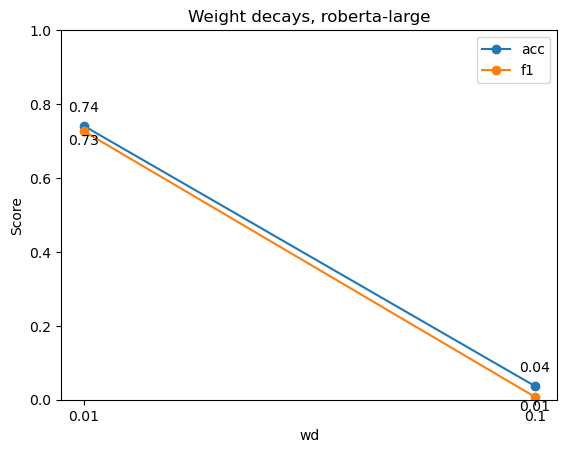

In [7]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Weight decays, {model_checkpoint}', 'wd')